## Instacart data files:

Below are all the data files that I downloaded from the Kaggle challenge page: https://www.kaggle.com/c/instacart-market-basket-analysis/data

- aisles.csv
- departments.csv
- order_products_prior.csv
- order_products_train.csv
- orders.csv
- products.csv
- sample_submission.csv

In [11]:
%pylab inline
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


In [12]:
aisles_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/aisles.csv')
departments_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/departments.csv')
order_products_prior_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/order_products_prior.csv')
order_products_train_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/order_products_train.csv')
orders_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/orders.csv')
products_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/products.csv')
sample_submission_df = pd.read_csv('/Users/joe.kholodenko/nyc19_ds18/scrap_folder/data/instacart-market-basket-analysis/sample_submission.csv')



In [13]:
df_order_products_train = order_products_train_df.merge(orders_df.drop('eval_set', axis=1), on='order_id')
df_order_products_prior = order_products_prior_df.merge(orders_df.drop('eval_set', axis=1), on='order_id')


In [14]:
# len(aisles_df)
# len(departments_df)
# len(order_products_prior_df)
# len(order_products_train_df)
# len(orders_df)
len(products_df)

49688

In [15]:
len(df_order_products_train)

1384617

In [16]:
# Take a random sample of both df_order_products_train and df_order_products_prior

df_order_products_train = df_order_products_train.sample(n=200000)
df_order_products_prior = df_order_products_prior.sample(n=200000)

In [17]:
# Setting up the problem
df_user_product = (df_order_products_prior.groupby(['product_id','user_id'],as_index=False) 
                                          .agg({'order_id':'count'}) 
                                          .rename(columns={'order_id':'user_product_total_orders'}))

train_ids = df_order_products_train['user_id'].unique() 
df_X = df_user_product[df_user_product['user_id'].isin(train_ids)]

In [18]:
df_X.head()

,product_id,user_id,user_product_total_orders
2,1,50005,1
7,1,94870,1
12,1,170714,1
17,3,204485,1
19,7,29045,1


In [19]:
train_carts = (df_order_products_train.groupby('user_id',as_index=False)
                                      .agg({'product_id':(lambda x: set(x))})
                                      .rename(columns={'product_id':'latest_cart'}))

df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))


In [20]:
train_carts

,user_id,latest_cart
0,2,"{22825, 34284, 33957, 24838}"
1,7,"{13198, 17638, 37999}"
2,8,{37803}
3,9,"{12075, 27973, 18926}"
4,14,"{3808, 8744, 15869, 29615}"
5,18,"{11022, 41463}"
6,21,"{44632, 32645}"
7,27,"{33754, 33787}"
8,29,"{42258, 20874}"
9,34,{24852}


In [21]:
# Plotting function, takes the dataframe and sample size
def plot_features(df, sample_size=500):
    sample = (df.drop(['product_id', 'user_id', 'latest_cart'], axis = 1)
               .sample(1000, random_state=42))
    sns.pairplot(sample, hue='in_cart', plot_kws=dict(alpha=.3, edgecolor='none'))
# what does 'alpha' and 'edgecolor' do?

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


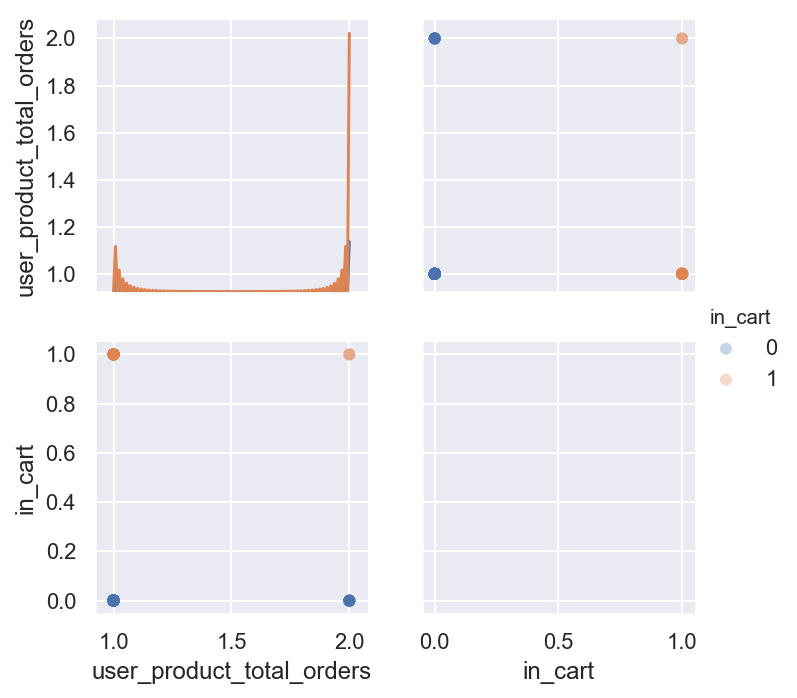

In [22]:
plot_features(df_X)

In [23]:
df_X.head(20)

,product_id,user_id,user_product_total_orders,latest_cart,in_cart
0,1,50005,1,{22028},0
1,37600,50005,1,{22028},0
2,42265,50005,1,{22028},0
3,1,94870,1,"{48733, 26767}",0
4,196,94870,1,"{48733, 26767}",0
5,48733,94870,1,"{48733, 26767}",1
6,1,170714,1,"{23915, 40939}",0
7,3,204485,1,"{40656, 47249, 25013, 31183}",0
8,7,29045,1,{47766},0
9,20114,29045,1,{47766},0


In [24]:
df_X.head()

,product_id,user_id,user_product_total_orders,latest_cart,in_cart
0,1,50005,1,{22028},0
1,37600,50005,1,{22028},0
2,42265,50005,1,{22028},0
3,1,94870,1,"{48733, 26767}",0
4,196,94870,1,"{48733, 26767}",0


In [25]:
def get_user_split_data(df, test_size=.2, seed=44):
    rs = np.random.RandomState(seed)
    
    total_users = df['user_id'].unique()
#     the logic here is useful. take a subsection of users, not just overall rows
    test_users = rs.choice((total_users), size=int(total_users.shape[0], * test_size), replace=False)
    
#     what does the tilde do? bitwise not operator, basically the same as ! in js
    df_tr = df[~df['user_id'].isin(test_users)]
    df_te = df[df['user_id'].isin(test_users)]
    
    y_tr, y_te = df_tr['in_cart'], df_te['in_cart']
    X_tr = df_tr.drop(['product_id', 'user_id', 'latest_cart', 'in_cart'], axis=1)
    X_te = df_te.drop(['product_id', 'user_id', 'latest_cart', 'in_cart'], axis=1)
    
    return X_tr, X_te, y_tr, y_te

- aisle_df
- departments_df
- df_order_products_train
- df_order_products_prior
- orders_df
- products_df
- sample_submission_df

0    0.961437
1    0.038563
Name: in_cart, dtype: float64


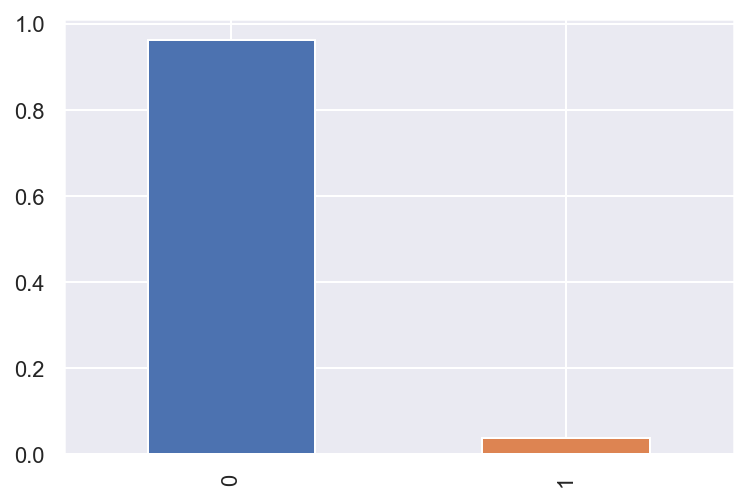

In [26]:
target_pcts = df_X.in_cart.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

##### My first goal is to find a good way to accurately sample data from my largest datasets so I can quickly iterate on a smaller dataset.

In [27]:
# 134 unique aisle ids
count_aisles = aisles_df.groupby('aisle')['aisle_id'].count()

In [28]:
df_order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
952713,2350027,47766,8,0,79131,4,4,18,7.0
124673,304819,18394,1,0,120778,24,1,15,7.0
838062,2066279,26369,9,1,36541,17,1,16,30.0
477312,1169670,45603,5,0,163133,5,0,11,5.0
348449,849608,22260,16,1,161063,22,6,16,12.0


In [29]:
count_aisles.sort_values(ascending=True)

aisle
air fresheners candles        1
packaged seafood              1
packaged produce              1
packaged poultry              1
packaged meat                 1
packaged cheese               1
other creams cheeses          1
other                         1
oral hygiene                  1
oils vinegars                 1
nuts seeds dried fruit        1
muscles joints pain relief    1
more household                1
missing                       1
mint gum                      1
milk                          1
meat counter                  1
marinades meat preparation    1
lunch meat                    1
laundry                       1
latino foods                  1
kosher foods                  1
kitchen supplies              1
juice nectars                 1
instant foods                 1
indian foods                  1
ice cream toppings            1
ice cream ice                 1
hot dogs bacon sausage        1
hot cereal pancake mixes      1
                             ..
fr

In [30]:
user_products_df = order_products_prior_df

## Questions to explore after looking at aisle data:
- How many unique products are there in each category?
- What are the most ordered categories?
- Which categories have a high re-ordering likelihood (within a window)?

In [31]:
# 21 Unique departments
departments_df['department'].nunique()

21

In [32]:
departments_df['department'].values

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [33]:
order_products_prior_df.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [34]:
order_products_prior_df['reordered']

0           1
1           1
2           0
3           1
4           0
5           1
6           1
7           1
8           0
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          0
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
           ..
32434459    0
32434460    0
32434461    1
32434462    0
32434463    0
32434464    0
32434465    0
32434466    0
32434467    0
32434468    0
32434469    0
32434470    0
32434471    0
32434472    1
32434473    1
32434474    0
32434475    1
32434476    1
32434477    0
32434478    0
32434479    0
32434480    0
32434481    0
32434482    1
32434483    0
32434484    1
32434485    0
32434486    0
32434487    1
32434488    1
Name: reordered, Length: 32434489, dtype: int64

In [35]:
# How many products are in each order? 
# What are the most reordered products?

sum_products_reordered = order_products_prior_df.groupby('product_id')['reordered'].sum().reset_index()
sum_products_reordered.head()

,product_id,reordered
0,1,1136
1,2,12
2,3,203
3,4,147
4,5,9


In [36]:
# 39123 different products len(sum_products_reordered)
sum_products_reordered = (sum_products_reordered.sort_values('reordered', ascending=False)
                                                .reset_index()
                                                .drop( ['index'], axis=1))

In [37]:
sum_products_reordered

,product_id,reordered
0,24852,398609
1,13176,315913
2,21137,205845
3,21903,186884
4,47209,170131
5,47766,134044
6,27845,114510
7,47626,106255
8,27966,105409
9,16797,99802


In [111]:
# sum_products_reordered = sum_products_reordered.drop(['level_0'], axis=1)
sum_products_reordered.head()

,product_id,reordered
0,24852,398609
1,13176,315913
2,21137,205845
3,21903,186884
4,47209,170131


In [39]:
sum_products_reordered

2047     1
44351    1
48477    1
46428    1
36187    1
34138    1
40281    1
38232    1
11599    1
9550     1
15693    1
13644    1
3403     1
1354     1
7497     1
5448     1
27975    1
25926    1
32069    1
30020    1
19779    1
17730    1
23873    1
42334    1
44383    1
21856    1
13676    1
48509    1
46460    1
36219    1
        ..
29307    1
31354    1
25209    1
27256    1
4727     1
12947    1
661      1
12979    1
41633    1
15026    1
8881     1
10928    1
37543    1
39590    1
33445    1
35492    1
45731    1
47778    1
43680    1
6806     1
21151    1
23198    1
17053    1
19100    1
29339    1
31386    1
25241    1
27288    1
4759     1
2049     1
Name: product_id, Length: 49677, dtype: int64

In [110]:
sum_products_reordered['reordered'].nunique()
# 4372 / 49677

#  / 3134

3134

In [ ]:
# Lots of outliers!
# sum_products_reordered.head()

plt.xlim([0,40])
plt.hist(sum_products_reordered, bins=np.arange(0, 40, 5))

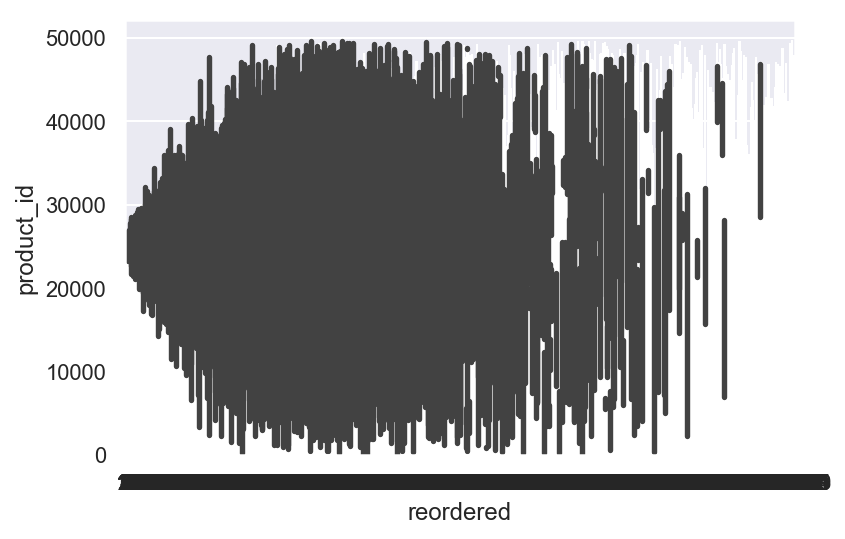

In [99]:
reordered_products_plt = sns.barplot(x='reordered', y='product_id', data=sum_products_reordered)

In [41]:
sum_products_reordered.head()

,product_id,reordered
0,24852,398609
1,13176,315913
2,21137,205845
3,21903,186884
4,47209,170131


In [42]:
sum_products_reordered['reordered'].describe()

count     49677.000000
mean        385.017936
std        3601.713646
min           0.000000
25%           4.000000
50%          22.000000
75%         115.000000
max      398609.000000
Name: reordered, dtype: float64

In [43]:
# 8947 products have been reordered 0 times.
sum_products_reordered[sum_products_reordered['reordered'] == 0].count()

product_id    4372
reordered     4372
dtype: int64

In [44]:
orders_df.head()
# products_df
# sample_submission_df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## # of orders per hour of the day


In [45]:
orders_per_hour = orders_df.groupby('order_hour_of_day')['order_id'].count().reset_index()

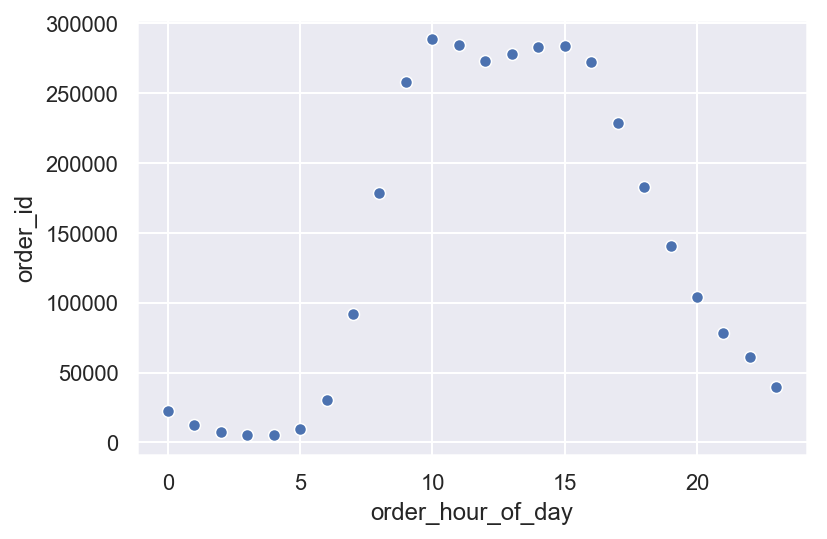

In [46]:
sns.scatterplot(orders_per_hour['order_hour_of_day'], orders_per_hour['order_id'])


In [47]:
# certain items that are ordered in the morning or night time vs the daytime


In [48]:
# Things that are ordered together, or oredered consecutively

# Try a random forest!
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [49]:
# 206209 unique users
# random_user_orders = orders_df[]

o = pd.DataFrame(list(set(list(orders_df['user_id'].values))))

In [50]:
len(orders_df['user_id'])

3421083

In [51]:
len(o)

206209

In [52]:
from sklearn.utils.random import sample_without_replacement

user_id_sample = o.sample(n=5000, random_state=42)
user_id_sample.columns = ['user_id']
user_id_sample.head()

,user_id
189032,189033
113006,113007
40368,40369
2152,2153
194849,194850


In [53]:
# rejoin smaller sample back onto the orders table
orders_df_sample = user_id_sample.merge(orders_df, how='inner', on='user_id')

In [54]:
orders_df_sample.head()

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,189033,296605,prior,1,3,8,NaN
1,189033,956270,prior,2,4,20,8.0
2,189033,1153213,prior,3,0,14,3.0
3,189033,2084846,prior,4,1,12,8.0
4,189033,2526872,prior,5,0,23,20.0


In [55]:
orders_products_df_sample = orders_df_sample.merge(order_products_prior_df, how='inner', on='order_id')

In [56]:
orders_products_df_sample.head()

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,189033,296605,prior,1,3,8,NaN,28058,1,0
1,189033,296605,prior,1,3,8,NaN,18465,2,0
2,189033,296605,prior,1,3,8,NaN,27344,3,0
3,189033,296605,prior,1,3,8,NaN,26751,4,0
4,189033,296605,prior,1,3,8,NaN,28204,5,0


In [57]:
orders_products_dept_df_sample = orders_products_df_sample.merge(products_df, how='inner', on='product_id')

In [58]:
orders_products_dept_df_sample.head()

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,189033,296605,prior,1,3,8,NaN,28058,1,0,Gluten Free Sliced Mountain White Bread,112,3
1,189033,956270,prior,2,4,20,8.0,28058,1,1,Gluten Free Sliced Mountain White Bread,112,3
2,189033,2526872,prior,5,0,23,20.0,28058,8,1,Gluten Free Sliced Mountain White Bread,112,3
3,189033,3255589,prior,8,0,15,30.0,28058,2,1,Gluten Free Sliced Mountain White Bread,112,3
4,49658,1178962,prior,10,3,12,18.0,28058,9,0,Gluten Free Sliced Mountain White Bread,112,3


In [59]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [60]:
# questions: having a harder time conceptualizing what sort of features i can create that
# actually will help the model and not be a proxy for an existing column if i use random forest

In [61]:
# orders by user by department by time of day

In [62]:
# Let's try to use a random forest classifier on this sample dataset

orders_products_dept_df_sample.head(10)
orders_products_dept_df_sample_droped_na = orders_products_dept_df_sample.dropna(axis=1)

In [63]:
orders_products_dept_df_sample_droped_na.head()

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,189033,296605,prior,1,3,8,28058,1,0,Gluten Free Sliced Mountain White Bread,112,3
1,189033,956270,prior,2,4,20,28058,1,1,Gluten Free Sliced Mountain White Bread,112,3
2,189033,2526872,prior,5,0,23,28058,8,1,Gluten Free Sliced Mountain White Bread,112,3
3,189033,3255589,prior,8,0,15,28058,2,1,Gluten Free Sliced Mountain White Bread,112,3
4,49658,1178962,prior,10,3,12,28058,9,0,Gluten Free Sliced Mountain White Bread,112,3


In [64]:
orders_products_dept_df_sample_droped_na['department_id'].value_counts()


4     230992
16    127521
19     68134
7      63737
1      54877
13     45802
3      28544
20     25296
15     25199
9      20738
12     17963
17     17178
14     16955
11     10867
18      9249
6       7133
5       3024
8       2248
21      1644
2        933
10       780
Name: department_id, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

decisiontree = RandomForestClassifier()

# removed 'reordered' column, since it's probably the target
# removed 'product_name' column, isnce it's a string
# removed 'days_since_prior_order'
features = orders_products_dept_df_sample_droped_na[['order_number', 'order_dow', 'order_hour_of_day', 'add_to_cart_order', 'aisle_id', 'department_id']]
target = orders_products_dept_df_sample_droped_na['reordered']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=42)

In [66]:
decisiontree.fit(x_train, y_train)

/Users/joe.kholodenko/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
order_products_train_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [68]:
rf1_test_pred = decisiontree.predict(x_test)

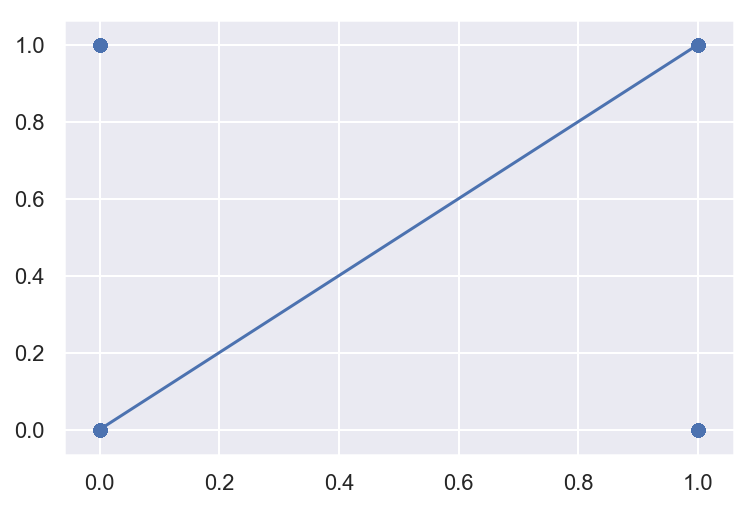

In [69]:
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(0,1,2),np.linspace(0,1,2))


In [70]:
orders_products_dept_df_sample.head()

,user_id,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,189033,296605,prior,1,3,8,NaN,28058,1,0,Gluten Free Sliced Mountain White Bread,112,3
1,189033,956270,prior,2,4,20,8.0,28058,1,1,Gluten Free Sliced Mountain White Bread,112,3
2,189033,2526872,prior,5,0,23,20.0,28058,8,1,Gluten Free Sliced Mountain White Bread,112,3
3,189033,3255589,prior,8,0,15,30.0,28058,2,1,Gluten Free Sliced Mountain White Bread,112,3
4,49658,1178962,prior,10,3,12,18.0,28058,9,0,Gluten Free Sliced Mountain White Bread,112,3


In [71]:
orders_products_dept_df_sample[['user_id', 'order_id', 'product_id']][orders_products_dept_df_sample['user_id'] == 71].sort_values(['user_id', 'order_id', 'product_id'])

,user_id,order_id,product_id
636515,71,21889,117
148679,71,21889,5785
184062,71,21889,9839
490712,71,21889,18531
449541,71,21889,19019
725017,71,21889,23216
94691,71,21889,24221
50486,71,21889,27243
502628,71,21889,30442
299131,71,21889,32537


In [72]:
orders_products_dept_df_sample[['user_id', 'order_id', 'order_number', 'days_since_prior_order', 'product_id', 'add_to_cart_order']].head()

,user_id,order_id,order_number,days_since_prior_order,product_id,add_to_cart_order
0,189033,296605,1,NaN,28058,1
1,189033,956270,2,8.0,28058,1
2,189033,2526872,5,20.0,28058,8
3,189033,3255589,8,30.0,28058,2
4,49658,1178962,10,18.0,28058,9


In [73]:
products_per_user = orders_products_dept_df_sample[['user_id', 'product_id']][orders_products_dept_df_sample['user_id'] == 71]
products_counts_per_user = products_per_user.groupby(['user_id', 'product_id'])['product_id'].agg({'count'})


In [74]:
products_counts_per_user = products_counts_per_user.sort_values('count', ascending=False).reset_index()

In [75]:
products_per_user = orders_products_dept_df_sample.groupby(['user_id', 'order_id'], sort=True)['product_id'].count().reset_index()

In [76]:
products_per_user[products_per_user['user_id'] == 71]

,user_id,order_id,product_id
0,71,21889,21
1,71,322607,13
2,71,364423,24
3,71,434668,26
4,71,461359,17
5,71,703584,26
6,71,920597,23
7,71,1072501,27
8,71,1382694,5
9,71,1437649,8


In [77]:
# products_counts_per_user['prob_of_item'] = products_counts_per_user['count'].apply(lambda x: x // products_counts_per_user['product_id'].sum().astype(float))






In [78]:
products_counts_per_user.head()

,user_id,product_id,count
0,71,48857,20
1,71,117,19
2,71,35108,14
3,71,42356,13
4,71,19730,12


In [79]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [80]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [81]:
# user_id and 
products_ordered_per_user = orders_products_dept_df_sample[['user_id', 'order_id', 'order_number', 'product_id', 'days_since_prior_order']] \
    .sort_values(['user_id', 'order_id'], ascending=False).reset_index().drop(['index'], axis=1)

# list orders sequentially based on days since prior order

In [82]:
products_ordered_per_user.head(50)

,user_id,order_id,order_number,product_id,days_since_prior_order
0,206165,3420822,27,27521,9.0
1,206165,3420822,27,1529,9.0
2,206165,3420822,27,15399,9.0
3,206165,3420822,27,13176,9.0
4,206165,3420822,27,26604,9.0
5,206165,3420822,27,7175,9.0
6,206165,3420822,27,49235,9.0
7,206165,3420822,27,24838,9.0
8,206165,3420822,27,48775,9.0
9,206165,3420822,27,30391,9.0


In [83]:
# user_id |  order_id | list of products by order
# 10001   |  436456   | [254326,236457,12347,65849]

# curr_cart = [15, 20] 

In [84]:
df_prod_orders_ago = (df_order_products_prior.groupby(['user_id', 'product_id'],as_index=False)
                                     .agg({'order_number':(lambda x: sorted(list(x)))})
                                     .rename(columns={'order_number':'list_of_orders'}))



In [85]:
# Creates a column for most recent order
df_prod_orders_ago['last_order_number'] = df_prod_orders_ago.apply(lambda x: x['list_of_orders'][-1], axis=1)
# df_prod_orders_ago.head()


In [86]:
def returnUserSecondMostRecentOrder(lst):
    if len(lst) < 2:
        return np.nan
    else:
        return lst[-2]

In [87]:
# Creates a column for second most recent order, using 
df_prod_orders_ago['second_to_last_order_number'] = df_prod_orders_ago.apply(lambda x: returnUserSecondMostRecentOrder(x['list_of_orders']), axis=1)
returnUserSecondMostRecentOrder

<function __main__.returnUserSecondMostRecentOrder(lst)>

In [88]:
# Subtract distance between last orders per each product/user combo

df_prod_orders_ago['orders_since_last_prod_purchase'] = df_prod_orders_ago.apply(lambda x: x['last_order_number'] - x['second_to_last_order_number'], axis=1)

In [89]:
df_prod_orders_ago.head(70)

,user_id,product_id,list_of_orders,last_order_number,second_to_last_order_number,orders_since_last_prod_purchase
0,2,22559,[9],9,NaN,NaN
1,3,7503,[3],3,NaN,NaN
2,3,17668,[11],11,NaN,NaN
3,4,22199,[4],4,NaN,NaN
4,7,27690,[3],3,NaN,NaN
5,7,40852,[17],17,NaN,NaN
6,11,8309,[1],1,NaN,NaN
7,11,13176,[7],7,NaN,NaN
8,14,23803,[5],5,NaN,NaN
9,15,1747,[19],19,NaN,NaN


In [90]:
2 features -> 
1. captures variation at the user level and assigns probabilities for what should be added to chart.
2. captures more general variate of ordering patterns across "similar" users. group them. 

SyntaxError: invalid syntax (<ipython-input-90-b9c0ca3189b2>, line 1)

In [ ]:
order_id | 

In [ ]:
orders_df.head()

In [ ]:
def order_hour_of_day_category(integer):
    if (integer >= 20) or (integer <= 5):
        return 1
    elif (integer > 5) or (integer <=10):
        return 2
    elif (integer > 10) or (integer <= 16):
        return 3
    elif (integer > 16) or (integer < 20):
        return 4

In [ ]:
orders_df['hour_of_day_category'] = orders_df.apply(lambda row: order_hour_of_day_category(row['order_hour_of_day']), axis=1)

In [ ]:
orders_df.head()

In [ ]:
df_order_products_prior.head()

In [ ]:
df_order_products_prior.head()

In [ ]:
from collections import defaultdict
d = defaultdict(int)

df_prod_count_per_order = (df_order_products_prior.groupby(['user_id', 'order_id'],as_index=False)
                                     .agg({'product_id':(lambda x: addListElementsToDict(list(x), d) )})
                                     )

In [ ]:
def addListElementsToDict(lst, d):
    for l in lst:
        d[l] += 1
    return d

In [ ]:
df_prod_count_per_order.head()

In [ ]:
# product popularity

prod_features = ['product_total_orders','product_avg_add_to_cart_order']

df_prod_features = (df_order_products_prior.groupby(['product_id'],as_index=False)
                                           .agg(OrderedDict(
                                                   [('order_id','nunique'),
                                                    ('add_to_cart_order','mean')])))
df_prod_features.columns = ['product_id'] + prod_features
df_prod_features.head()

In [ ]:
# From a feature engineering perspective, I would be curious to see how user product loyalty factors in.
# For example, if someone buys Coke repeatedly, they are unlikely to buy Pepsi.
# Is there a way to penalize other highly similar products if we know that someone buys many repeat products?


In [ ]:
# Creating the df to use for the model


In [ ]:
orders_df.head()

In [ ]:
df_order_features = orders_df[['order_id', 'user_id', 'hour_of_day_category','days_since_prior_order']]



In [ ]:
df_prod_orders_ago.head()

In [ ]:
prod_orders_features = df_prod_orders_ago[['user_id', 'product_id', 'orders_since_last_prod_purchase']]

In [ ]:
df_prod_features.head()

In [ ]:
df_prod_features

##### 2/11/2019

## Goals for today:
- Create dataframe for ml
- Run a model:
    - decision tree model
    - random forest with bagging
    - apply a solution to class imbalance
- Run the model on all the data in AWS
    - set up the original problem and create the feature set in AWS

In [ ]:
# merge feature dataframes
df_order_features 
prod_orders_features
df_prod_features

In [ ]:
df_X.head()

In [ ]:
order_features_merged = df_X.merge(df_order_features, how='inner', on='user_id')

In [ ]:
order_features_merged['days_since_prior_order'] = order_features_merged['days_since_prior_order'].fillna(-1)

In [ ]:
order_features_merged.head()

In [ ]:
prod_orders_features['orders_since_last_prod_purchase'] = prod_orders_features['orders_since_last_prod_purchase'].fillna(-1)

In [ ]:
prod_orders_features.head()

In [ ]:
order_product_features_merge = order_features_merged.merge(prod_orders_features, how='inner', on=['user_id', 'product_id'])

In [ ]:
order_prod_merged_final = order_product_features_merge.merge(df_prod_features, how='inner', on='product_id')

In [ ]:
order_prod_merged_final.head()

In [ ]:
df_X_final = (order_prod_merged_final[['product_id', 'user_id', 'hour_of_day_category', 'days_since_prior_order', 
                                       'orders_since_last_prod_purchase', 'product_total_orders', 'product_avg_add_to_cart_order', 'in_cart']])



In [ ]:
df_X_final.head()

In [100]:
import pickle

with open('df_X_final.pkl', 'wb') as f:
    pickle.dump(df_X_final, f)

In [101]:
len(list(np.arange(.03, 3000, 100)))

30